In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.losses import KLDivergence, sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau


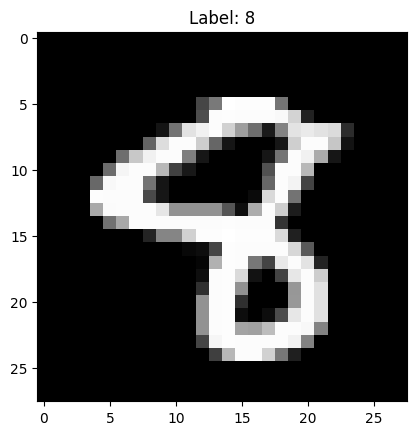

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine training and test datasets to get the full dataset
x_full = np.concatenate((x_train, x_test), axis=0)
y_full = np.concatenate((y_train, y_test), axis=0)


# Function to select a specified number of samples for each category
def select_samples(x, y, num_samples):
    selected_samples = []
    selected_labels = []
    for i in range(10):  # 10 categories in MNIST
        indices = np.where(y == i)[0][:num_samples]
        selected_samples.append(x[indices])
        selected_labels.append(y[indices])
    selected_samples = np.concatenate(selected_samples, axis=0)
    selected_labels = np.concatenate(selected_labels, axis=0)
    return selected_samples, selected_labels

# Select 1,000 samples for each category
x_subset, y_subset = select_samples(x_full, y_full, 1000)

# Display one random image from x_train_subset
index = np.random.randint(0, len(x_subset))
image = x_subset[index]

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_subset[index]}")
plt.show()



# Split the subset into training and testing sets
x_train_subset, x_test_subset, y_train_subset, y_test_subset = train_test_split(
    x_subset, y_subset, test_size=0.2, random_state=42
)



[  27  231  298  306  553  672  706  859  971  993 1018 1201 1276 1386
 1506 1532 1601 1671 1845 1939 2070 2071 2181 2222 2489 2500 2676 2680
 2842 2947 3228 3277 3325 3329 3350 3503 3582 3587 3625 3834 4027 4081
 4399 4636 4727 4756 4796 4797 4820 4947 5222 5495 5604 5647 5653 5853
 5859 5894 5935 5985 6050 6128 6273 6401 6420 6516 6538 6623 6757 6775
 7331 7376 7384 7461 7522 7532 7625 7647 7799 7848 8027 8221 8224 8242
 8385 8428 8762 8777 8854 8996 9009 9181 9292 9712 9719 9748 9804 9838
 9985 9990]
100


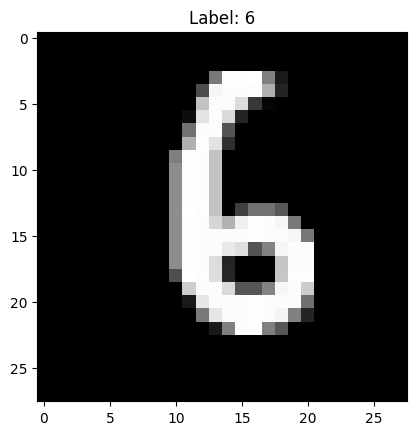

(90, 10) akfdkafdkjh (90,) (100,)


In [3]:
np.random.seed(0)
labeled_mask = np.zeros(10000, dtype=bool)
for i in range(10):
    indices = np.where(np.array(y_subset) == i)[0] # returns shuffled array of indices of each class, total 1000 data.
    np.random.shuffle(indices)
    labeled_mask[indices[:10]] = True


print(np.where(labeled_mask)[0])

labeled_dataset_to_be_trained_index = np.where(labeled_mask)[0]
unlabeled_dataset_index = np.where(~labeled_mask)[0]



labeled_dataset_to_be_trained_x = np.array([x_subset[index]  for index in labeled_dataset_to_be_trained_index])
labeled_dataset_to_be_trained_y = np.array([y_subset[index]  for index in labeled_dataset_to_be_trained_index])

unlabeled_dataset_x = np.array([x_subset[index]  for index in unlabeled_dataset_index])
# unlabeled_dataset_y = np.array([y_subset[index]  for index in unlabeled_dataset_index])

print(len(labeled_dataset_to_be_trained_y))

unique_labels = np.unique([y for y in labeled_dataset_to_be_trained_y])




# Display one random image from x_train_subset
index = np.random.randint(0, len(labeled_dataset_to_be_trained_x))
image = labeled_dataset_to_be_trained_x[index]


# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {labeled_dataset_to_be_trained_y[index]}")
plt.show()



# train_labels_one_hot_y = keras.utils.to_categorical(unique_labels, num_classes=10)

# Split the subset into training and testing sets
labeled_x_train_subset,labeled_x_test_subset, labeled_y_train_subset, labeled_y_test_subset = train_test_split(
    labeled_dataset_to_be_trained_x, labeled_dataset_to_be_trained_y, test_size=0.1, random_state=42
)

train_labels_y = keras.utils.to_categorical(labeled_y_train_subset, num_classes=10)
test_labels_y = keras.utils.to_categorical(labeled_y_test_subset, num_classes=10)

print(train_labels_y.shape, 'akfdkafdkjh', labeled_y_train_subset.shape, labeled_dataset_to_be_trained_y.shape)





In [8]:
# Build the neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
# model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(labeled_x_train_subset, train_labels_y , epochs=20, batch_size=64, validation_data=(labeled_x_test_subset, test_labels_y))
model.fit(labeled_x_train_subset, train_labels_y , epochs=100, batch_size=20)

print(labeled_x_test_subset.shape)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(labeled_x_test_subset, test_labels_y)
test_loss_ul, test_acc_ul = model.evaluate(unlabeled_dataset_x)

print('\nTest accuracy:', test_acc)
print('\nTest accuracy for unlabeled data set:', test_acc_ul)


Epoch 1/100
5/5 [==============================] - 2s 9ms/step - loss: 166.5521 - accuracy: 0.1778
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 105.5731 - accuracy: 0.3111
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 49.9916 - accuracy: 0.4778
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 35.2217 - accuracy: 0.5778
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 24.5506 - accuracy: 0.6667
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 15.0060 - accuracy: 0.7222
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 11.3006 - accuracy: 0.8333
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 12.9317 - accuracy: 0.7556
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 7.8849 - accuracy: 0.8556
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 7.5032 - accuracy: 0.8667
Epoch 11/100
5/5

In [15]:
# Virtual Adversarial Training
x = labeled_x_train_subset

def generate_random_unit_vector(input):
    x = np.random.normal(0, 1, input.shape)
    d = x / np.linalg.norm(x)
    return d


r = tf.random.normal(shape=tf.shape(labeled_x_train_subset))
# r =  generate_random_unit_vector(r)
perturbed_input = labeled_x_train_subset+0.01*r

model_vat = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])

alpha = 0.001  # A hyperparameter for controlling the strength of the perturbation
optimizer = keras.optimizers.Adam()
model_vat.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


def virtual_adversarial_loss(x, logits):
    d = generate_random_unit_vector(x)

    with tf.GradientTape() as tape:
        tape.watch(x)
        logits_perturbed = model_vat(x + alpha * d)
        loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    r_vadv = tape.gradient(loss, x)
    r_vadv_normalized = alpha * r_vadv / tf.norm(r_vadv)

    logits_perturbed = model_vat(x + r_vadv_normalized)
    loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    return loss



epochs = 20
batch_size = 20

for epoch in range(epochs):
    for i in range(0, len(perturbed_input), batch_size):
        x_batch = perturbed_input[i:i+batch_size]
        y_batch = train_labels_y[i:i+batch_size]
        with tf.GradientTape() as tape:
            logits = model_vat(x_batch)
            classification_loss = tf.keras.losses.categorical_crossentropy(y_batch, logits)
            vat_loss = virtual_adversarial_loss(x_batch, logits)
            total_loss = classification_loss + vat_loss
        gradients = tape.gradient(total_loss, model_vat.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_vat.trainable_variables))

    if i % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/80] Total Loss: {mean_total_loss:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_vat.evaluate(labeled_x_test_subset, test_labels_y)
print("Test accuracy for VAT:", test_acc)
# Evaluate the model on the unlabeled data set, first use mode to predict the logit

unlabeled_predictions = model_vat.predict(unlabeled_dataset_x)
unlabeled_predictions_exact = np.argmax(unlabeled_predictions, axis=1)
unlabeled_dataset_y_for_vat = np.array([y_subset[index]  for index in unlabeled_dataset_index])

print(unlabeled_predictions_exact.shape, 'shape', unlabeled_dataset_y_for_vat.shape)
accuracy_unlabeled = np.mean(unlabeled_predictions_exact == unlabeled_dataset_y_for_vat)
print("Accuracy on unlabeled dataset:", accuracy_unlabeled)



Epoch [1/20], Step [81/80] Total Loss: 79.8332
Epoch [2/20], Step [81/80] Total Loss: 13.6079
Epoch [3/20], Step [81/80] Total Loss: 5.7493
Epoch [4/20], Step [81/80] Total Loss: 1.2135
Epoch [5/20], Step [81/80] Total Loss: 0.0000
Epoch [6/20], Step [81/80] Total Loss: 0.0000
Epoch [7/20], Step [81/80] Total Loss: 0.0000
Epoch [8/20], Step [81/80] Total Loss: 0.0000
Epoch [9/20], Step [81/80] Total Loss: 0.0000
Epoch [10/20], Step [81/80] Total Loss: 0.0001
Epoch [11/20], Step [81/80] Total Loss: 0.0002
Epoch [12/20], Step [81/80] Total Loss: 0.0002
Epoch [13/20], Step [81/80] Total Loss: 0.0002
Epoch [14/20], Step [81/80] Total Loss: 0.0002
Epoch [15/20], Step [81/80] Total Loss: 0.0001
Epoch [16/20], Step [81/80] Total Loss: 0.0001
Epoch [17/20], Step [81/80] Total Loss: 0.0001
Epoch [18/20], Step [81/80] Total Loss: 0.0000
Epoch [19/20], Step [81/80] Total Loss: 0.0000
Epoch [20/20], Step [81/80] Total Loss: 0.0000
1/1 [==============================] - 0s 250ms/step - loss: 44.818

In [23]:
# Entropy minimization
x = labeled_x_train_subset

model_entropy_minimization = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])

alpha = 0.001  # A hyperparameter for controlling the strength of the perturbation
optimizer = keras.optimizers.Adam()
model_entropy_minimization.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


def entropy_minimization_loss(y_true, y_pred, alpha=0.001):
    # Calculating the standard cross-entropy loss
    # print("INSIDE ENTROPY MINIMIZATION LOSS", y_true, y_pred)
    cross_entropy_loss = categorical_crossentropy(y_true, y_pred)
    # print(cross_entropy_loss.shape)


    # Calculating the entropy of the predicted probabilities
    epsilon = 1e-10
    entropy = tf.reduce_sum(-y_pred * tf.math.log(y_pred + epsilon), axis=1)
    # print('afdkafjk', entropy)

    # Combining the cross-entropy loss with the entropy regularization term
    total_loss = cross_entropy_loss + alpha * entropy

    # tf.debugging.check_numerics(cross_entropy_loss, "cross_entropy_loss is NaN or Inf")

    return total_loss




epochs = 20
batch_size = 20

for epoch in range(epochs):
    for i in range(0, len(x), batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = train_labels_y[i:i+batch_size]
        with tf.GradientTape() as tape:
            logits = model_entropy_minimization(x_batch)
            total_loss = entropy_minimization_loss(y_batch,logits )
        gradients = tape.gradient(total_loss, model_entropy_minimization.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_entropy_minimization.trainable_variables))

    if i % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/80] Total Loss: {mean_total_loss:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_entropy_minimization.evaluate(labeled_x_test_subset, test_labels_y)
print("Test accuracy for Entropy minimization:", test_acc)
# Evaluate the model on the unlabeled data set, first use mode to predict the logit

unlabeled_predictions = model_entropy_minimization.predict(unlabeled_dataset_x)
unlabeled_predictions_exact = np.argmax(unlabeled_predictions, axis=1)
unlabeled_dataset_y_for_entropy_minimization = np.array([y_subset[index]  for index in unlabeled_dataset_index])

print(unlabeled_predictions_exact.shape, 'shape', unlabeled_dataset_y_for_entropy_minimization.shape)
accuracy_unlabeled = np.mean(unlabeled_predictions_exact == unlabeled_dataset_y_for_entropy_minimization)
print("Accuracy on unlabeled dataset for entropy minimization:", accuracy_unlabeled)



Epoch [1/20], Step [81/80] Total Loss: 95.2384
Epoch [2/20], Step [81/80] Total Loss: 20.0099
Epoch [3/20], Step [81/80] Total Loss: 9.9000
Epoch [4/20], Step [81/80] Total Loss: 4.7003
Epoch [5/20], Step [81/80] Total Loss: 0.2726
Epoch [6/20], Step [81/80] Total Loss: 0.5209
Epoch [7/20], Step [81/80] Total Loss: 0.0000
Epoch [8/20], Step [81/80] Total Loss: 0.0002
Epoch [9/20], Step [81/80] Total Loss: 0.0004
Epoch [10/20], Step [81/80] Total Loss: 0.0003
Epoch [11/20], Step [81/80] Total Loss: 0.0001
Epoch [12/20], Step [81/80] Total Loss: 0.0000
Epoch [13/20], Step [81/80] Total Loss: 0.0000
Epoch [14/20], Step [81/80] Total Loss: 0.0000
Epoch [15/20], Step [81/80] Total Loss: 0.0000
Epoch [16/20], Step [81/80] Total Loss: 0.0000
Epoch [17/20], Step [81/80] Total Loss: 0.0000
Epoch [18/20], Step [81/80] Total Loss: 0.0000
Epoch [19/20], Step [81/80] Total Loss: 0.0000
Epoch [20/20], Step [81/80] Total Loss: 0.0000


1/1 [==============================] - 0s 243ms/step - loss: 35.7277 - accuracy: 0.5000
Test accuracy for VAT: 0.5
310/310 [==============================] - 1s 2ms/step
(9900,) shape (9900,)
Accuracy on unlabeled dataset: 0.6366666666666667


In [58]:
# Entropy minimization
# Log likelihood of labelled data

# labeled_x_train_subset, train_labels_y

# Just for checking
# print(train_labels_y[0])
# image = labeled_x_train_subset[0]
# # Display the image
# plt.imshow(image, cmap='gray')
# plt.title(f"Label: {train_labels_y[0]}")
# plt.show()
# just for checking single input
# single_input = np.reshape(labeled_x_test_subset[0], (1, 28, 28))
# prediction = model.predict(single_input)
# print(np.argmax(prediction))
# LOG LIKELIHOOD OF LABELLED DATA
# dot product of labeled one hot vector & prediction and then finding log of each data and then finding sum.

# predictions_y = model.predict(labeled_x_train_subset)
# print(predictions_y)
# dot_product_of_one_hot_vector_predictions = np.dot(train_labels_y.T, predictions_y)
# epsilon = 1e-10
# dot_product_result = np.maximum(dot_product_of_one_hot_vector_predictions, epsilon)
# log_result = np.log(dot_product_result)
# result = np.sum(log_result, axis=1)
# print("HKJFDHAKJFHDSJKFHAJSFHEUWHUI", log_result, result)


# sum_of_all_categories_for_ith_data = np.sum(np.log(train_labels_y.T, predictions_y))
# print(sum_of_all_categories_for_ith_data)
# max_predictions_value = np.argmax(predictions)
# print(max_predictions_value,'fjahjfhdalfj')
# print(predictions_y.shape, np.dot(train_labels_y.T, predictions_y).shape,  np.log(np.dot(train_labels_y.T, predictions_y)))
# output_dot_product = np.dot(train_labels_y.T, predictions_y)
# print(output_dot_product.shape,'fkhdsakjfhdajklsh')


def entropy_minimization_loss(y_true, y_pred, alpha=0.001):
    # Calculating the standard cross-entropy loss
    print("INSIDE ENTROPY MINIMIZATION LOSS", y_true, y_pred)
    cross_entropy_loss = categorical_crossentropy(y_true, y_pred)
    print(cross_entropy_loss.shape)


    # Calculating the entropy of the predicted probabilities
    entropy = tf.reduce_sum(-y_pred * tf.math.log(y_pred), axis=1)
    print('afdkafjk', entropy)

    # Combining the cross-entropy loss with the entropy regularization term
    total_loss = cross_entropy_loss + alpha * entropy

    # tf.debugging.check_numerics(cross_entropy_loss, "cross_entropy_loss is NaN or Inf")

    return total_loss



model_entropy_minimization = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])
model_entropy_minimization.compile(optimizer='adam', loss=entropy_minimization_loss, metrics=['accuracy'])
model_entropy_minimization.fit(labeled_x_train_subset, train_labels_y, epochs=20, batch_size=64)

test_loss, test_acc = model_entropy_minimization.evaluate(labeled_x_test_subset, test_labels_y)
print("Test accuracy for entropy minimization", test_acc)

# optimizer = Adam(clipvalue=1.0)  # You can adjust the clip value
# model.compile(optimizer=optimizer, loss=entropy_minimization_loss, metrics=['accuracy'])
# model.compile(optimizer='adam', loss=entropy_minimization_loss, metrics=['accuracy'])

print("NaNs in input data:", np.isnan(labeled_x_train_subset).any())
print("Infinities in input data:", np.isinf(labeled_x_train_subset).any())

# Check for NaN or infinite values in labels
print("NaNs in labels:", np.isnan(train_labels_y).any())
print("Infinities in labels:", np.isinf(train_labels_y).any())

# model.fit(labeled_x_train_subset, train_labels_y, epochs=20, batch_size=64)



# predictions_y = model.predict(labeled_x_train_subset)
# dot_product_of_one_hot_vector_predictions = np.dot(train_labels_y.T, predictions_y)
# epsilon = 1e-10
# dot_product_result = np.maximum(dot_product_of_one_hot_vector_predictions, epsilon)
# log_result = np.log(dot_product_result)
# result = np.sum(log_result, axis=1)


# For unlabelled data
# unlabeled_datas_y = np.ones((9900,10))
# predictions_unlabeled_y = model.predict(unlabeled_dataset_x)

# test_loss, test_acc = model.evaluate(unlabeled_dataset_x, predictions_unlabeled_y)
# print('test accuracy', test_acc)

# print(predictions_unlabeled_y.shape, 'shape of unlabeled')
# log_of_each_predictions = np.log(predictions_unlabeled_y)
# print('afdkjashfdjahfjdhfajhdjfd', log_of_each_predictions)
# print(labeled_x_test_subset.shape)
# Evaluate the model on the test set
# print(log_of_each_predictions.shape)
# test_loss, test_acc = model.evaluate(unlabeled_dataset_x, log_of_each_predictions)
# print('test accuracy', test_acc)

# epsilon = 1e-10
# lambda_params = 0.1
# log_of_each_predictions_result = np.maximum(log_of_each_predictions, epsilon)


# dot_product_of_log_predicted_and_predicted = np.dot(predictions_unlabeled_y.T, log_of_each_predictions_result)
# print('kafkjhdahfjhfjkahfja', log_of_each_predictions_result.shape, predictions_unlabeled_y.shape, dot_product_of_log_predicted_and_predicted.shape)
# result_unlabelled = np.sum(dot_product_of_log_predicted_and_predicted, axis=1)
# print('Final result for unlabeled', result_unlabelled*lambda_params)



Epoch 1/20
INSIDE ENTROPY MINIMIZATION LOSS Tensor("IteratorGetNext:1", shape=(None, 10), dtype=float32) Tensor("sequential_15/dense_31/Softmax:0", shape=(None, 10), dtype=float32)
(None,)
afdkafjk Tensor("entropy_minimization_loss/Sum:0", shape=(None,), dtype=float32)
INSIDE ENTROPY MINIMIZATION LOSS Tensor("IteratorGetNext:1", shape=(None, 10), dtype=float32) Tensor("sequential_15/dense_31/Softmax:0", shape=(None, 10), dtype=float32)
(None,)
afdkafjk Tensor("entropy_minimization_loss/Sum:0", shape=(None,), dtype=float32)
2/2 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.1000
Epoch 2/20
2/2 [==============================] - 0s 20ms/step - loss: nan - accuracy: 0.1000
Epoch 3/20
2/2 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.1000
Epoch 4/20
2/2 [==============================] - 0s 23ms/step - loss: nan - accuracy: 0.1000
Epoch 5/20
2/2 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.1000
Epoch 6/20
2

In [11]:
# pseudo labels:
pseudo_label_predictions = model.predict(unlabeled_dataset_x)
max_predictions_value = np.argmax(pseudo_label_predictions)



train_labels_y_value = keras.utils.to_categorical(labeled_dataset_to_be_trained_y, num_classes=10)
#  combine labeled & unlabeled dataset:
new_train_x = np.vstack((labeled_dataset_to_be_trained_x, unlabeled_dataset_x))
new_train_y = np.vstack((train_labels_y_value, pseudo_label_predictions))


print(labeled_dataset_to_be_trained_x.shape, unlabeled_dataset_x.shape, new_train_x.shape)
print(train_labels_y.shape, pseudo_label_predictions.shape,new_train_y.shape)

# train the model with this dataset
labeled_x_train_subset_pseudo,labeled_x_test_subset_pseudo, labeled_y_train_subset_pseudo, labeled_y_test_subset_pseudo = train_test_split(
    new_train_x, new_train_y, test_size=0.2, random_state=42
)

# train_labels_y_pseudo = keras.utils.to_categorical(labeled_y_train_subset_pseudo, num_classes=10)
# test_labels_y_pseudo = keras.utils.to_categorical(labeled_y_test_subset_pseudo, num_classes=10)

# Extract true labels for the labeled subset
train_labels_y_pseudo = labeled_y_train_subset_pseudo[:, :10]
test_labels_y_pseudo = labeled_y_test_subset_pseudo[:, :10]

print(train_labels_y_pseudo.shape, test_labels_y_pseudo.shape, labeled_x_train_subset_pseudo.shape)
# Train the model
model.fit(labeled_x_train_subset_pseudo, train_labels_y_pseudo , epochs=20, batch_size=64)
# model.fit(labeled_x_train_subset_pseudo, train_labels_y_pseudo , epochs=20, batch_size=64, validation_data=(labeled_x_test_subset_pseudo, test_labels_y_pseudo))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(labeled_x_test_subset_pseudo, test_labels_y_pseudo)
print('\nTest accuracy:', test_acc)



310/310 [==============================] - 1s 3ms/step
98969 fjahjfhdalfj
(9900, 10) 98969
(100, 28, 28) (9900, 28, 28) (10000, 28, 28)
(80, 10) (9900, 10) (10000, 10)
(8000, 10) (2000, 10) (8000, 28, 28)
Epoch 1/20
125/125 [==============================] - 1s 7ms/step - loss: 5.7006 - accuracy: 0.6386
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 1.6521 - accuracy: 0.5790
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 1.3484 - accuracy: 0.6061
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 1.2512 - accuracy: 0.6314
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 1.1232 - accuracy: 0.6411
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 1.0580 - accuracy: 0.6706
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 1.0285 - accuracy: 0.6726
Epoch 8/20
125/125 [==============================] - 1s 6ms/step - loss: 1.0239 - accuracy: 0.